In [4]:
# import modules that we need
from pathlib import Path  # makes handling of paths and file names easier
import matplotlib.pyplot as plt
import xarray as xr       # convenient for reading NetCDF files and preserving metadata
import numpy as np

# input data directory
fname = Path('/extra-space1/data/tikoralukupload/cis-weekly/nc/HB.nc')


## Read Data
Here we use the [`xarray`](http://xarray.pydata.org/en/stable/) package that is very convienient to read NetCDF files because it preserves the data structure.

In [5]:
### Load data into a `xarray.Dataset`:
# Note that the data is loaded lazily which means that no actual data are actually written
# into memory.
ds = xr.open_dataset(fname)

# See what the data look like
print(ds)

<xarray.Dataset>
Dimensions:    (juld: 1043, x: 2654, y: 2595)
Coordinates:
  * x          (x) float64 3.45e+04 3.55e+04 3.65e+04 ... 2.686e+06 2.688e+06
  * y          (y) float64 3.76e+06 3.758e+06 3.758e+06 ... 1.166e+06 1.166e+06
  * juld       (juld) datetime64[ns] 1997-01-01 1997-02-01 ... 2020-10-26
Data variables:
    crs        int32 ...
    land       (y, x) float64 ...
    longitude  (y, x) float32 ...
    latitude   (y, x) float32 ...
    E_CA       (juld, y, x) float64 ...
    E_CB       (juld, y, x) float64 ...
    E_CC       (juld, y, x) float64 ...
    E_CD       (juld, y, x) float64 ...
    E_CT       (juld, y, x) float64 ...
    E_FA       (juld, y, x) float64 ...
    E_FB       (juld, y, x) float64 ...
    E_FC       (juld, y, x) float64 ...
    E_FD       (juld, y, x) float64 ...
    E_FE       (juld, y, x) float64 ...
    E_SA       (juld, y, x) float64 ...
    E_SB       (juld, y, x) float64 ...
    E_SC       (juld, y, x) float64 ...
    E_SD       (juld, y, x) f

As we can see, the dataset `ds` has three dimensions with coordinates `x`, `y`, and `juld`. Furthermore, the data variables contain information which coordinates their dimensions belong to.

### Subsetting
The dimensions and coordinates make it very easy to subset your data. There are two methods:

#### By Coordinate
Since the coordinates are retained for each variable we can use them to subset the dataset. In this case you would use the `.sel()` method. Let's assume you wanted to choose all data where `x` is between 1.0e6 and 1.5e6 m and `y` is less or equal 2.5e6 m, you would write
```
ds = ds.sel(x=slice(1.0e6, 1.5e6), y=slice(None, 2.5e6))
```

#### By Index
This method is similar to the conventional subsetting of `numpy` arrays, but makes use of the dimension names. To select your data based on the indexes, you should use the `.isel()` method. For example, we are now selecting all data where the index of the `x` dimension is greater that 1700 and the index of the `y` dimension is between 600 and 1450:

In [6]:
# subset `xarray.Dataset` by index
ds = ds.isel(x=slice(1700, None), y=slice(600, 1450))

# Note that this subsets the entire dataset and therefore, you only have to do it once for all variables.

To select one of the variables, you can either use the "dot notation", i.e., `ds.<name>` or treat `ds` like a `dict` and select the variables using brackets, i.e., `ds[<name>]`. Here, `<name>` is the name of the variable in the `xr.Dataset`.

In [7]:
# variable name
vname = 'E_CT'

# create shortcuts to the variables
lon = ds.longitude
lat = ds.latitude
# juld = ds.juld
land = ds.land
E_CT = ds[vname]

# Note that I chose the bracket notation for the last variable and used a variable `vname`
# to specify which field we want to look at. This makes the code more flexible as we could
# define a list of names that we can loop through to run the same analysis systematically
# for multiple variables.

# Let's have a look:
print(E_CT)

<xarray.DataArray 'E_CT' (juld: 1043, y: 850, x: 954)>
[845768700 values with dtype=float64]
Coordinates:
  * x        (x) float64 1.734e+06 1.736e+06 1.736e+06 ... 2.686e+06 2.688e+06
  * y        (y) float64 3.16e+06 3.158e+06 3.158e+06 ... 2.312e+06 2.31e+06
  * juld     (juld) datetime64[ns] 1997-01-01 1997-02-01 ... 2020-10-26
Attributes:
    units:         [{"raster_value": "0", "column_value": "0", "quantitative_...
    long_name:     Ct: Total concentration
    grid_mapping:  crs


The variable `E_CT` is now a `xarray.DataArray`. Think of it as a `numpy` array, but the dimensions have the coordinates preserved. As you can see, it also has kept all the attributes from the original input file. Although the array has all the additional information it behaves like a `numpy` array. This just demonstrates the benefit of using the `xarray` package. The `.sel()` and `.isel()` methods that we applied to the whole `xarray.Dataset` above can also be applied to a `xarray.DataArray`.

If you are not convinced yet, here is a bonus: `xarray` comes with its own plotting routines (that use `matplotlib` under the hood)

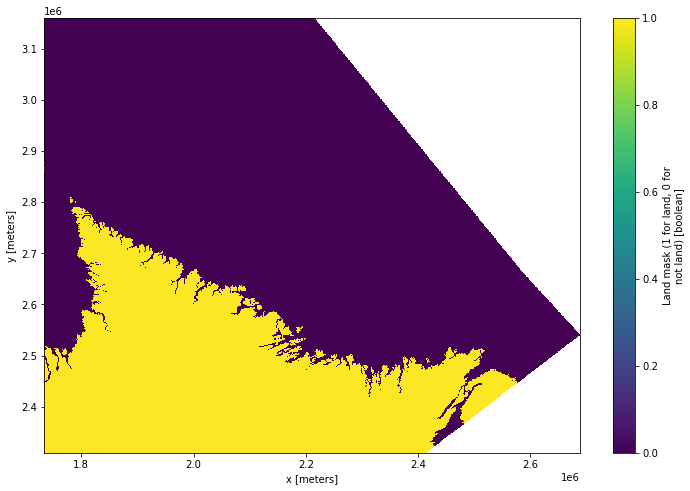

In [13]:
# plot the land/sea mask variable `land`
plt.figure(figsize=((12, 8)))
land.plot()

Since the variable `land` is has two dimensions, `xarray` automatically calls the `pcolormesh` function from the `matplotlib` package and and the embedded coordinate information (including the units) is used to specify the axes of the plot. Because of the stored attribute `long_name`, it also knows what data is actually stored in the variable. This information is used as a label for the colorbar.

We could have been more specific in the plotting command, but this is just is just a demonstration of the powerful features of `xarray` to make quick plots to check your data. 

## Take an average along one dimension


<ipython-input-11-2ffc51c9cbc1>:1: RuntimeWarning: Mean of empty slice
  ybar = np.nanmean(E_CT, axis=0) # along time dimension which is the 0th dimension


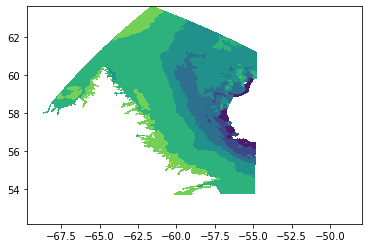

In [11]:
ybar = np.nanmean(E_CT, axis=0) # along time dimension which is the 0th dimension
plt.contourf(lon, lat, ybar)